In [1]:
%matplotlib inline
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from polyphys.manage import organizer
from polyphys.manage import parser
from polyphys.visualize import tuner as ptuner
from polyphys.visualize import plotter
import seaborn as sns

## Excluded-volume models

### Loading data
- Creating *allInOne* dataset: Do this step if there is no  **allInOne-vExc.csv** file, or it exist but has to bew updated.

In [ ]:
#vexc_files = glob("/Users/amirhsi_mini/OneDrive - University of Waterloo/PhD Research/Mathematica/vExc_Models/vExc_data/*.csv")
vexc_files = glob("/Users/amirhsi/OneDrive - University of Waterloo/PhD Research/Mathematica/vExc_Models/vExc_data/*.csv")
vexc_files = organizer.sort_filenames(vexc_files, fmts=['csv'])
vexc_df = []
limit = True # limit exclude volumes to --vexc_ath, vexc_athr]
for vexc_file in vexc_files:
    vexc_info = parser.ExcludedVolume(vexc_file[0])
    vexc_info.read_data()
    vexc_info.scale(limit=limit)
    vexc_info.add_model_info()
    vexc_df.append(vexc_info.vexc_df)
vexc_df = pd.concat(vexc_df, axis=0)
vexc_df.reset_index(inplace=True, drop=True)
if limit is True:
    vexc_df.to_csv('allInOne-vExc-limit.csv', index=False)
else:
    vexc_df.to_csv('allInOne-vExc.csv', index=False)

- DO this if you want to use an existing **allInOne-vExc.csv** file

In [ ]:
vexc_df = pd.read_csv('allInOne-vExc-limit.csv')

### Plots

In [ ]:
dcrowds = [0.2, 0.3, 0.6, 0.8, 1.0, 2.0, 4.0, 6.0]
plotter.p_vexc_models(
    vexc_df,
    dcrowds
)

In [ ]:
label_dict_long = {"vfrc_c":r"Volume fraction of crowders ($\phi_c$)",
             "vfrc_c_scaled":r"Rescaled volume fraction of crowders (${a\phi_c}/{a_c}$)",
             "exc_vol_scaled":r"Rescaled exc. volume ($v_{exc}/v_{athr}$)",
                  "r_scaled_max":r"Normalized chain size ($R/R_{0}$)",
                  "rho_c":r"Density of crowders ($\rho_c$) in $a^{-3}$"}

In [ ]:
dcrowds = [0.2, 0.8, 1.0, 2.0, 5.0]
plotter.p_vexc_dcrowds(
    vexc_df,
    dcrowds,
    fontsize=16
)

## Free-energy approach

### Loading data

In [ ]:
#vexc_files = glob("/Users/amirhsi_mini/OneDrive - University of Waterloo/PhD Research/Mathematica/vExc_Models/vExc_data/*.csv")
#free_energy_files = glob("/Users/amirhsi_mini/OneDrive - University of Waterloo/PhD Research/Mathematica/Free energy approach/FreeEnergyApproach-VirialExpansion-allInOne-data/*.csv")
free_energy_files = glob('/Users/amirhsi/OneDrive - University of Waterloo/PhD Research/Mathematica/Free energy approach/FreeEnergyApproach-VirialExpansion-allInOne-data/*.csv')
free_energy_files = organizer.sort_filenames(free_energy_files, fmts=['csv'])
phi_c_out_cap=0.45
chain_free_energy = []
for free_energy_file in free_energy_files[:2]:
    free_energy_info = parser.FreeEnergyVirial(free_energy_file[0])
    free_energy_info.read_data()
    free_energy_info.scale(phi_c_out_cap)
    free_energy_info.add_model_info()
    free_energy_info.r_chain_df.sort_values(by='phi_c_out')
    chain_free_energy.append(free_energy_info.r_chain_df)
chain_free_energy = pd.concat(chain_free_energy, axis=0)
chain_free_energy.reset_index(inplace=True, drop=True)
chain_free_energy.to_csv(
    f'allInOne-freeEnergyVirial-phiCrdLimit{phi_c_out_cap}.csv',
    index=False
)
mathematica_cols = [
    'rhoOut', 'rhoIn', 'rChain', 'phiCout', 'phiCin','rScaled','tailModel',
    'vdepModel', 'nMon', 'dCyl', 'dCrowd'
]
chain_free_energys_mathemaitca = chain_free_energy.copy()
chain_free_energys_mathemaitca.columns = mathematica_cols
chain_free_energys_mathemaitca.to_csv(
    f'allInOne-freeEnergyVirial-phiCrdLimit{phi_c_out_cap}-Mathemaitca.csv',
    index=False
)
del chain_free_energys_mathemaitca

In [4]:
## Extendeding data set for Mathematica
free_energy_files = glob("/Users/amirhsi_mini/OneDrive - University of Waterloo/PhD Research/Mathematica/Free energy approach/FreeEnergyApproach-VirialExpansion-allInOne-data/*.csv")
free_energy_files = organizer.sort_filenames(free_energy_files, fmts=['csv'])
phi_c_out_cap=0.45
for free_energy_file in free_energy_files:
    free_energy_info = parser.FreeEnergyVirial(free_energy_file[0])
    free_energy_info.read_data()
    free_energy_info.scale(phi_c_out_cap)
    free_energy_info.add_model_info()
    free_energy_info.r_chain_df.sort_values(by='phi_c_out')
    free_energy_info.r_chain_df.loc[:,'phi_c_relative'] = free_energy_info.r_chain_df.loc[:, 'phi_c_in'] / free_energy_info.r_chain_df.loc[:, 'phi_c_out']
    free_energy_info.r_chain_df.loc[:,'confinement_rate'] = free_energy_info.r_chain_df.loc[:, 'dcrowd'] / free_energy_info.r_chain_df.loc[:,'dcyl']
    free_energy_info.r_chain_df.loc[:,'confinement_rate'] = free_energy_info.r_chain_df.loc[:,'confinement_rate'].round(decimals=3)
    free_energy_info.r_chain_df.loc[:,'phi_c_out_scaled'] = free_energy_info.r_chain_df.loc[:, 'phi_c_out'] / free_energy_info.r_chain_df.loc[:, 'dcrowd']
    free_energy_info.r_chain_df.to_csv(
        "./free_energy_extended/"+free_energy_file[0].split("/")[-1],
        index=False,
        header=False
    )

In [22]:
free_energy_file[0].split("/")[-1]

'LJ-Ha-N80D5ac0.3.csv'

- DO this if you want to use an existing **allInOne-vExc.csv** file

In [4]:
phi_c_out_cap=0.45
chain_free_energy_original = pd.read_csv(f'allInOne-freeEnergyVirial-phiCrdLimit{phi_c_out_cap}.csv')

### finding the uppoer limit on $\rho_o$ based on the limit on $\phi_o$

In [ ]:
phi_c_out_cap=0.45
chain_free_energy.groupby(['nmon', 'dcyl', 'dcrowd']).max().reset_index()[['nmon', 'dcyl', 'dcrowd','rho_c_out']].to_csv(f"max_rho_c_out_for_phi_c_limit{phi_c_out_cap}.csv", index =False)

## Viz

In [8]:
dcrowds = [0.2, 0.3, 0.6, 1, 2, 4, 6]
dcyls = [5, 15, 30]
nmons = [80, 500, 2000]
cond = (
    chain_free_energy_original['nmon'].isin(nmons) &
    chain_free_energy_original['dcrowd'].isin(dcrowds) &
    chain_free_energy_original['dcyl'].isin(dcyls)
)
chain_free_energy = chain_free_energy_original[cond].copy()
chain_free_energy

,rho_c_out,rho_c_in,r_chain,phi_c_out,phi_c_in,r_scaled,tail_model,vdep_model,nmon,dcyl,dcrowd
0,0.100000,0.096313,37.477703,0.000419,0.000403,1.000000,LJ,Ha,80.0,5.0,0.2
1,0.100000,0.096313,37.477703,0.000419,0.000403,1.000000,LJ,Ha,80.0,5.0,0.2
2,0.200000,0.192626,37.472700,0.000838,0.000807,0.999867,LJ,Ha,80.0,5.0,0.2
3,0.200000,0.192626,37.472700,0.000838,0.000807,0.999867,LJ,Ha,80.0,5.0,0.2
4,0.300000,0.288937,37.467664,0.001257,0.001210,0.999732,LJ,Ha,80.0,5.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...
661384,0.003966,0.002958,138.507393,0.448544,0.334489,0.494537,ThreeBody,deVries,2000.0,30.0,6.0
661385,0.003969,0.002959,138.303500,0.448883,0.334701,0.493809,ThreeBody,deVries,2000.0,30.0,6.0
661386,0.003972,0.002961,138.099655,0.449223,0.334912,0.493081,ThreeBody,deVries,2000.0,30.0,6.0
661387,0.003975,0.002963,137.895858,0.449562,0.335122,0.492353,ThreeBody,deVries,2000.0,30.0,6.0


In [9]:
chain_free_energy.loc[:,'phi_c_relative'] = chain_free_energy.loc[:, 'phi_c_in'] / chain_free_energy.loc[:, 'phi_c_out']
chain_free_energy.loc[:,'confinement_rate'] = chain_free_energy.loc[:, 'dcrowd'] / chain_free_energy.loc[:,'dcyl']
chain_free_energy.loc[:,'confinement_rate'] = chain_free_energy.loc[:,'confinement_rate'].round(decimals=3)
chain_free_energy.loc[:,'phi_c_out_scaled'] = chain_free_energy.loc[:, 'phi_c_out'] / chain_free_energy.loc[:, 'dcrowd']

In [10]:
pd.set_option('display.max_columns', 75)
chain_free_energy[['dcrowd','dcyl','confinement_rate']].sort_values(by=['confinement_rate']).drop_duplicates()

,dcrowd,dcyl,confinement_rate
426959,0.2,15.0,0.013
584770,0.3,15.0,0.020
340765,0.6,30.0,0.020
657696,1.0,30.0,0.033
355462,0.2,5.0,0.040
270568,0.6,15.0,0.040
183411,0.3,5.0,0.060
507500,2.0,30.0,0.067
589123,1.0,15.0,0.067
2835,0.6,5.0,0.120


In [11]:
flar_cmap = mpl.colors.ListedColormap(sns.cm._flare_lut)
flare_cmap_cut = ptuner.truncated_colormap(flar_cmap,  min_value=0.0, max_value=1.0, ncolors=200)
mpl.cm.register_cmap("flare_cmap_cut", flare_cmap_cut)

In [12]:
conf_rates = chain_free_energy['confinement_rate'].drop_duplicates().sort_values().values
conf_rate_colors = sns.color_palette("coolwarm_r", len(conf_rates))#,as_cmap=True)
conf_rate_dict = dict(zip(conf_rates,conf_rate_colors))
conf_rate_colors

[(0.8393649370784314, 0.32185622094117644, 0.26492398098039216),
 (0.9318312966, 0.5190855232, 0.4064796086),
 (0.9684997476666667, 0.673977379772549, 0.5566492560470588),
 (0.9473454036, 0.7946955048, 0.7169905058),
 (0.863391831290196, 0.8650837958196078, 0.8676338842627451),
 (0.753610618, 0.830232851, 0.960871157),
 (0.6193179451882354, 0.7441207347647059, 0.9989309188196078),
 (0.48385432959999997, 0.6220498496, 0.9748082026),
 (0.34832334141176474, 0.4657111465098039, 0.8883461629411764)]

In [13]:
cond_ha = chain_free_energy['vdep_model']=='Ha'
chain_free_energy_ha = chain_free_energy.loc[cond_ha,:]

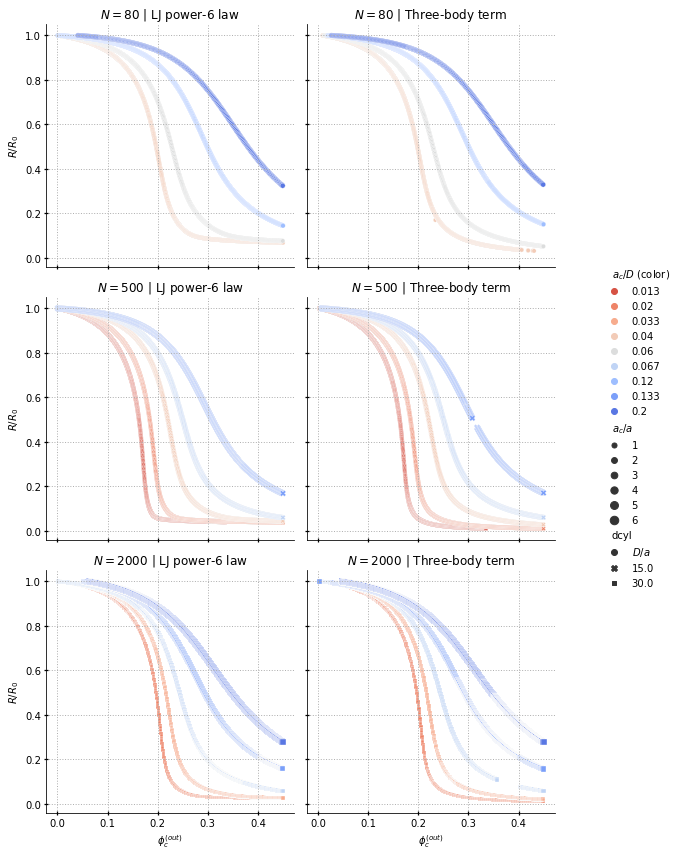

In [15]:
tail_fullname = [' | LJ power-6 law', 
                 ' | Three-body term']

sns.plotting_context(font_scale=3)
#sns.set_style("white")
sns.axes_style("white")
chain_grid = sns.relplot(
    data=chain_free_energy_ha,
    x='phi_c_out',
    y='r_scaled',
    hue='confinement_rate',
    style='dcyl',
    size='dcrowd',
    col='tail_model',
    row='nmon',
    kind='scatter',
    palette=conf_rate_dict,
    height=4,
    alpha=None
) 
#chain_grid.set_titles(template=r"$N={row_name}$ | 'Monomer-monomer interaction:{col_name}")

for row in range(len(chain_grid.axes)):
    chain_grid.axes[row,0].set_title(fr"$N={nmons[row]}$" + tail_fullname[0])
    chain_grid.axes[row,0].grid(True, ls=':', lw=1)
    chain_grid.axes[row,0].tick_params(axis='both', direction='inout', width=1.25)
    chain_grid.axes[row,1].set_title(fr"$N={nmons[row]}$" + tail_fullname[1])
    chain_grid.axes[row,1].grid(True, ls=':', lw=1)
    chain_grid.axes[row,1].tick_params(axis='both', direction='inout', width=1.25)
chain_grid._legend.texts[0].set_text(r"${a_c}/{D}$ (color)")
chain_grid._legend.texts[1+len(conf_rates)].set_text(r"${a_c}/{a}$")
chain_grid._legend.texts[2+len(conf_rates)+len(dcrowds)].set_text(r"${D}/{a}$")
chain_grid.set_ylabels(r"${R}/{R_0}$")
chain_grid.set_xlabels(r"$\phi_c^{(out)}$")
chain_grid.tight_layout()

In [ ]:
tail_fullname = [' | LJ power-6 law', 
                 ' | Three-body term']

sns.plotting_context(font_scale=3)
#sns.set_style("white")
sns.axes_style("white")
chain_grid = sns.relplot(
    data=chain_free_energy_ha,
    x='phi_c_out',
    y='phi_c_relative',
    hue='confinement_rate',
    style='dcyl',
    size='dcrowd',
    col='tail_model',
    row='nmon',
    kind='scatter',
    palette=conf_rate_dict,
    height=4,
    alpha=None
) 
#chain_grid.set_titles(template=r"$N={row_name}$ | 'Monomer-monomer interaction:{col_name}")

for row in range(len(chain_grid.axes)):
    chain_grid.axes[row,0].set_title(fr"$N={nmons[row]}$" + tail_fullname[0])
    chain_grid.axes[row,0].grid(True, ls=':', lw=1)
    chain_grid.axes[row,0].tick_params(axis='both', direction='inout', width=1.25)
    chain_grid.axes[row,1].set_title(fr"$N={nmons[row]}$" + tail_fullname[1])
    chain_grid.axes[row,1].grid(True, ls=':', lw=1)
    chain_grid.axes[row,1].tick_params(axis='both', direction='inout', width=1.25)
chain_grid._legend.texts[0].set_text(r"${a_c}/{D}$ (color)")
chain_grid._legend.texts[1+len(conf_rates)].set_text(r"${a_c}/{a}$")
chain_grid._legend.texts[2+len(conf_rates)+len(dcrowds)].set_text(r"${D}/{a}$")
chain_grid.set_ylabels(r"${\phi_c^{(in)}}/{\phi_c^{(out)}}$")
chain_grid.set_xlabels(r"$\phi_c^{(out)}$")
chain_grid.tight_layout()

In [ ]:
sns.relplot(
    data=chain_free_energy,
    x='phi_c_out',
    y='r_scaled',
    hue='dcyl',
    style='dcrowd',
    col='nmon',
    kind='scatter',
    palette="Spectral",
    col_wrap=3
)

In [ ]:
sns.relplot(
    data=chain_free_energy,
    x='phi_c_out',
    y='r_scaled',
    hue='nmon',
    style='dcyl',
    col='dcrowd',
    kind='scatter',
    palette="Spectral",
    col_wrap=3
)

In [ ]:
sns.relplot(
    data=chain_free_energy,
    x='phi_c_out',
    y='r_scaled',
    hue='dcyl',
    style='nmon',
    col='dcrowd',
    kind='scatter',
    palette="Spectral",
    col_wrap=3
)